<a href="https://colab.research.google.com/github/RepnaiaE/DataScience_functional-state-analysis/blob/main/Cardiogram_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 1/Lab 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft, fftfreq

sns.set(rc={'figure.figsize':(10,4)})

In [ ]:
data = pd.read_csv('data.csv', header=None)

### Кардиоритмограмма/Cardiorhythmogram

<AxesSubplot:>

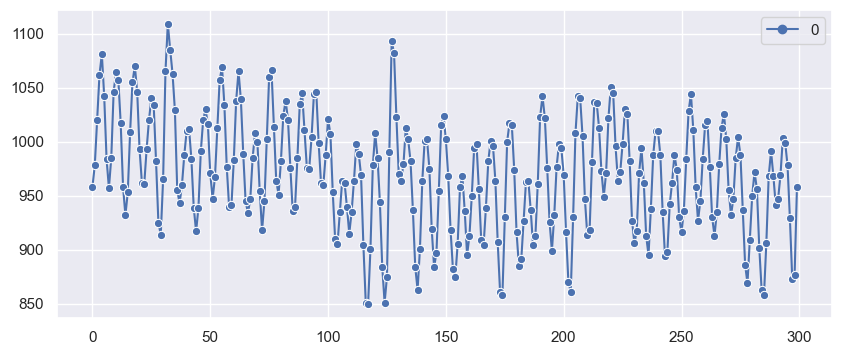

In [ ]:
sns.lineplot(data, markers=True)

### Интерполяция/Interpolation

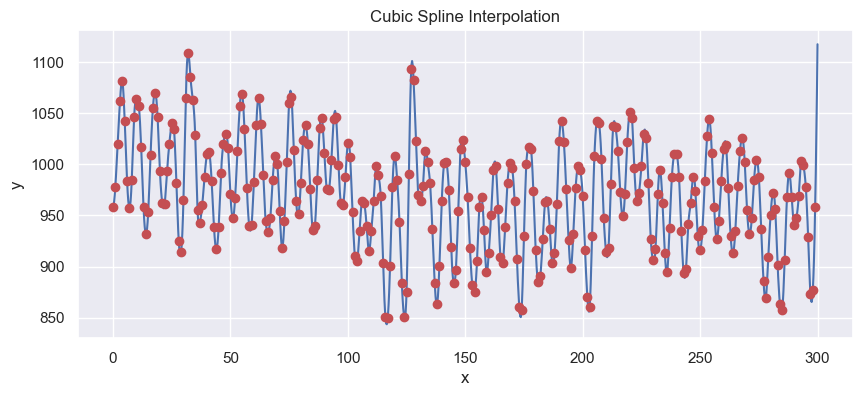

In [ ]:
from scipy.interpolate import CubicSpline

t = int(1 // 0.25)

x = np.arange(data.size)
y = data[0].to_numpy()

cs_func = CubicSpline(x, y)

x_cs = np.linspace(0, x.size, x.size * t)
y_cs = cs_func(x_cs)

plt.plot(x_cs, y_cs)
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Преобразование фурье/Fourier transform

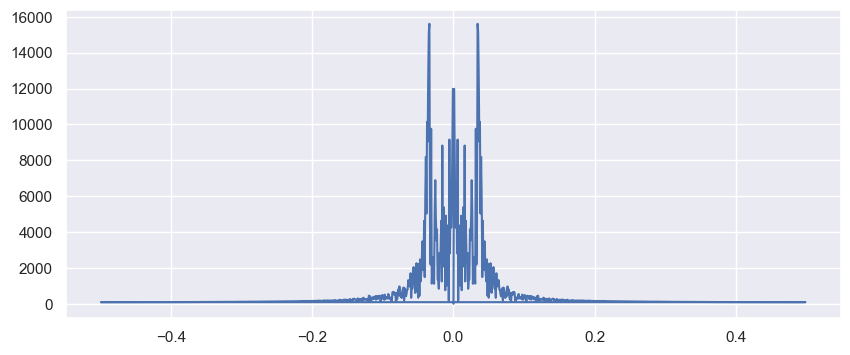

In [ ]:
fpg = y_cs - y_cs.mean()
yf = fft(fpg)
xf = fftfreq(len(fpg))

plt.plot(xf, np.abs(yf))
plt.show()

In [ ]:
def power(xf, yf, min: float, max: float) -> float:
    argmin = np.argwhere(xf >= min)[0][0]
    argmax = np.argwhere(xf <= max)[-1][0]
    range_len = (argmax - argmin) + 1
    print(argmin, argmax, range_len)
    return sum([(np.abs(yf[i])**2 / range_len**2) for i in range(argmin, argmax + 1)])

hf_power = np.round(power(xf, yf, 0.15, 0.4), 2)
lf_power = np.round(power(xf, yf, 0.04, 0.15), 2)
vlf_power = np.round(power(xf, yf, 0.015, 0.04), 2)
ulf_power = np.round(power(xf, yf, 0.0, 0.015), 2)

total_power = hf_power + lf_power + vlf_power + ulf_power

ic = np.round((vlf_power + lf_power)/hf_power, 2)
ivv = np.round(lf_power/hf_power, 2)
isca = np.round(lf_power/vlf_power, 2)


print(f"Суммарную мощность спектра ВСР: {total_power}")
print("HF:")
print(f"\tмощность: {hf_power}")
print(f"\t% соотношение к total: {np.round((hf_power/total_power)*100, 2)} %")
print("LF:")
print(f"\tмощность: {lf_power}")
print(f"\t% соотношение к total: {np.round((lf_power/total_power)*100, 2)} %")
print("VLF:")
print(f"\tмощность: {vlf_power}")
print(f"\t% соотношение к total: {np.round((vlf_power/total_power)*100, 2)} %")
print("ULF:")
print(f"\tмощность: {ulf_power}")
print(f"\t% соотношение к total: {np.round((ulf_power/total_power)*100, 2)} %")
print(f"ИЦ: {ic}")
print(f"ИВВ: {ivv}")
print(f"ИАП: {isca}")

180 1199 1020
48 1199 1152
18 1199 1182
0 1199 1200
Суммарную мощность спектра ВСР: 8726.87
HF:
	мощность: 1911.38
	% соотношение к total: 21.9 %
LF:
	мощность: 1606.23
	% соотношение к total: 18.41 %
VLF:
	мощность: 2456.42
	% соотношение к total: 28.15 %
ULF:
	мощность: 2752.84
	% соотношение к total: 31.54 %
ИЦ: 2.13
ИВВ: 0.84
ИАП: 0.65


### Вывод
ИЦ (индекс централизации) > 1 говорит нам о преобладании недыхательных составляющих синусовой аритмии над дыхательными. Показатели VLF и ULF говорят нам о психоэмоциональном напряжении.

Conclusion
IC(centralization index) > 1 tells us about the predominance of the non-respiratory components of sinus arrhythmia over the respiratory ones. VLF and ULF indicators tell us about psycho-emotional stress.